In [1]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

import utils

def rpy2rot(y, p, r):
    roll = lambda r: np.array([[1, 0, 0], [0, np.cos(r), np.sin(r)], [0, -np.sin(r), np.cos(r)]], dtype=np.float64)
    pitch = lambda p: np.array([[np.cos(p), 0, -np.sin(p)], [0, 1, 0], [np.sin(p), 0, np.cos(p)]], dtype=np.float64)
    yaw = lambda y: np.array([[np.cos(y), np.sin(y), 0], [-np.sin(y), np.cos(y), 0], [0, 0, 1]], dtype=np.float64)
    return roll(r) @ pitch(p) @ yaw(y)


def convert_line_to_pose(line):
    # returns T_iv
    line = line.replace('\n', ',').split(',')
    line = [float(i) for i in line[:-1]]
    # x, y, z -> 1, 2, 3
    # roll, pitch, yaw -> 7, 8, 9
    T = np.eye(4, dtype=np.float64)
    T[0, 3] = line[1]  # x
    T[1, 3] = line[2]  # y
    T[2, 3] = line[3]  # z
    T[:3, :3] = rpy2rot(line[9], line[8], line[7])

    return T


def load_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)


def load_gt_poses(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    poses = []
    for line in lines[1:]:
        pose = convert_line_to_pose(line)
        poses.append(pose)

    T_s0_m = npla.inv(poses[0])
    poses = [T_s0_m @ T_ms for T_ms in poses]
    return np.array(poses)


def plot_pred_poses(ax, pred_poses, gt_poses, label):
    # T_gt_pred = utils.align_path(gt_poses, pred_poses)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label)


gt_path = '/home/yuchen/ASRL/data/boreas/sequences/'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/boreas/aeva'
sequences = [
    'boreas-2022-07-19-16-06',
    'boreas-2022-08-05-12-59',
    'boreas-2022-08-05-13-30',
    'boreas-2022-08-05-13-54',
    'boreas-2022-08-05-15-01',
]

In [2]:
### compute kitti metric
sequence = sequences[0]

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'applanix/aeva_poses.csv'))

  ##
  pred_file = 'elastic_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_rv_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
boreas-2022-07-19-16-06:
elastic_0808_1                      & 0.42 & 0.0015 & 1.72 & 0.0098            & 0.0182 & 0.0299 & 0.0265 & 0.1998 \\
steam_0808_1                        & 0.40 & 0.0014 & 1.71 & 0.0098            & 0.0070 & 0.0213 & 0.0202 & 0.1873 \\
steam_rv_0808_1                     & 0.40 & 0.0013 & 1.72 & 0.0097            & 0.0045 & 0.0210 & 0.0193 & 0.1873 \\
boreas-2022-08-05-12-59:
elastic_0808_1                      & 0.41 & 0.0007 & 2.80 & 0.0058            & 0.0189 & 0.0216 & 0.0584 & 0.1079 \\
steam_0808_1                        & 0.46 & 0.0008 & 2.83 & 0.0058            & 0.0084 & 0.0122 & 0.0557 & 0.0980 \\
steam_rv_0808_1                     & 0.40 & 0.0005 & 2.81 & 0.0057            & 0.0065 & 0.0122 & 0.0554 & 0.0981 \\
boreas-2022-08-05-13-30:
elastic_0808_1                      & 0.36 & 0.0008 & 3.00 & 0.0055            & 0.0195 & 0.0206 & 0.0693 &

In [3]:
### compute kitti metric
sequence = sequences[0]

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'applanix/aeva_poses.csv'))

  ##
  pred_file = 'elastic_60m_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_60m_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_60m_rv_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
boreas-2022-07-19-16-06:
elastic_60m_0808_1                  & 0.48 & 0.0018 & 1.75 & 0.0099            & 0.0223 & 0.0430 & 0.0298 & 0.2087 \\
steam_60m_0808_1                    & 0.41 & 0.0015 & 1.75 & 0.0098            & 0.0073 & 0.0241 & 0.0203 & 0.1886 \\
steam_60m_rv_0808_1                 & 0.45 & 0.0015 & 1.76 & 0.0098            & 0.0045 & 0.0237 & 0.0193 & 0.1887 \\
boreas-2022-08-05-12-59:
elastic_60m_0808_1                  & 0.78 & 0.0019 & 3.05 & 0.0066            & 0.0248 & 0.0378 & 0.0607 & 0.1179 \\
steam_60m_0808_1                    & 0.64 & 0.0013 & 3.00 & 0.0063            & 0.0116 & 0.0187 & 0.0562 & 0.1001 \\
steam_60m_rv_0808_1                 & 0.63 & 0.0014 & 3.00 & 0.0063            & 0.0064 & 0.0175 & 0.0553 & 0.0998 \\
boreas-2022-08-05-13-30:
elastic_60m_0808_1                  & 0.94 & 0.0027 & 3.44 & 0.0067            & 0.0276 & 0.0362 & 0.0720 &

In [5]:
### compute kitti metric
sequence = sequences[0]

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'applanix/aeva_poses.csv'))

  ##
  pred_file = 'elastic_40m_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_40m_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_40m_rv_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
boreas-2022-07-19-16-06:
steam_40m_0808_1                    & 0.89 & 0.0034 & 2.04 & 0.0107            & 0.0087 & 0.0286 & 0.0209 & 0.1889 \\
steam_40m_rv_0808_1                 & 0.69 & 0.0024 & 1.91 & 0.0100            & 0.0045 & 0.0274 & 0.0194 & 0.1888 \\
boreas-2022-08-05-12-59:
steam_40m_0808_1                    & 67.40 & 0.1281 & 68.32 & 0.1305            & 2.3255 & 4.9426 & 2.3263 & 4.9860 \\
steam_40m_rv_0808_1                 & 1.80 & 0.0046 & 3.87 & 0.0093            & 0.0163 & 0.0261 & 0.0574 & 0.1026 \\
boreas-2022-08-05-13-30:
steam_40m_0808_1                    & 2.91 & 0.0069 & 5.17 & 0.0105            & 0.0906 & 0.0331 & 0.1114 & 0.0858 \\
steam_40m_rv_0808_1                 & 1.83 & 0.0052 & 4.74 & 0.0098            & 0.0325 & 0.0230 & 0.0722 & 0.0793 \\
boreas-2022-08-05-13-54:
steam_40m_0808_1                    & 1.88 & 0.0050 & 3.61 & 0.0142            &

In [ ]:
sequence = sequences[2]

fig, ax = plt.subplots(3, 2, figsize=(6, 6))

error_file = 'elastic_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label='elastic')

error_file = 'steam_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label='steam')

error_file = 'steam_rv_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label='steam_rv')

utils.add_legend(ax)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, len(sequences), figsize=(6 * len(sequences), 6))

for i, sequence in enumerate(sequences):
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'applanix/aeva_poses.csv'))
  ax[i].plot(gt_poses[:, 0, 3], gt_poses[:, 1, 3], label='ground truth')

  pred_file = '20220808/elastic'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  plot_pred_poses(ax[i], pred_poses, gt_poses, 'elastic-reduced')

  pred_file = '20220808/steam'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  plot_pred_poses(ax[i], pred_poses, gt_poses, 'steam-reduced')

  pred_file = '20220808/steam_rv'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  plot_pred_poses(ax[i], pred_poses, gt_poses, 'steam-rv-reduced')

  ax[i].set_xlabel('x (m)')
  ax[i].set_ylabel('y (m)')
  ax[i].set_title(sequence)
  ax[i].legend()

plt.show()

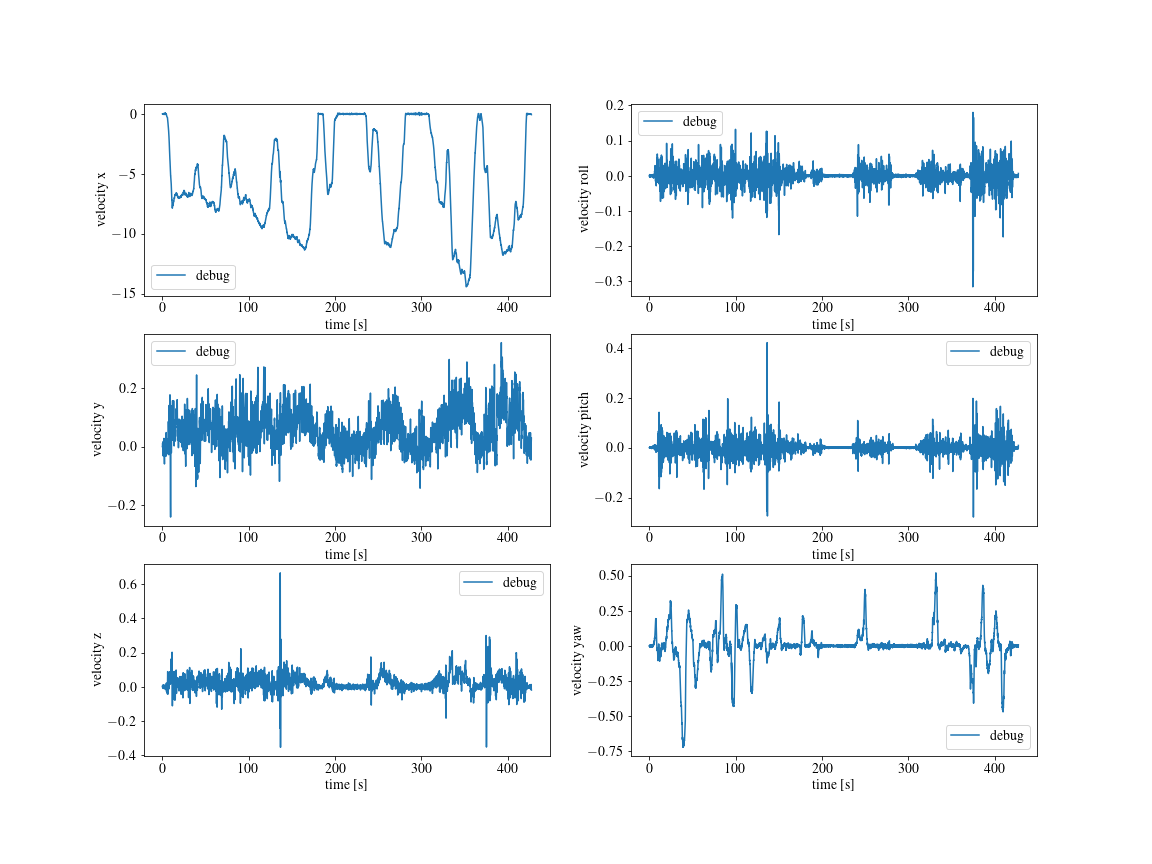

In [2]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

utils.add_plot_velocity(ax, '/home/yuchen/ASRL/temp/doppler_odometry/boreas/aeva/steam_0808_1/trajectory_1659984466.txt', 'debug')

utils.add_legend(ax)
plt.show()

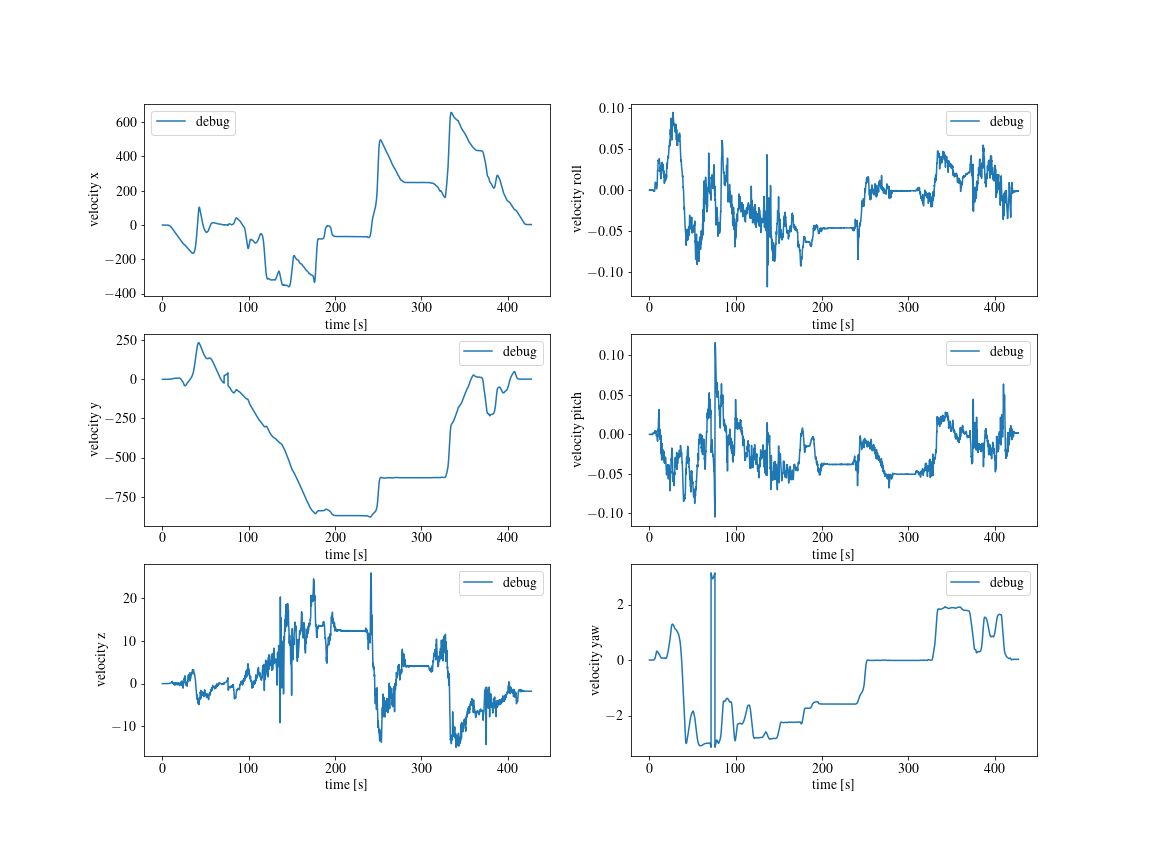

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

utils.add_plot_pose(ax, '/home/yuchen/ASRL/temp/doppler_odometry/boreas/aeva/steam_0808_1/trajectory_1659984466.txt', 'debug')

utils.add_legend(ax)
plt.show()